## Desarrollado por: Diego Bernales Valdivia

## Instalación e importación de librerias

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install Selenium
!apt-get update
!apt install chromium-chromedriver

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')
print('==> Setting up environment - Done')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image
import time
from selenium.webdriver.common.keys import Keys 

In [ ]:
# Configuración del driver (Navegador)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

## Accediendo a la pagina

In [ ]:
browser.get('https://books.toscrape.com/')

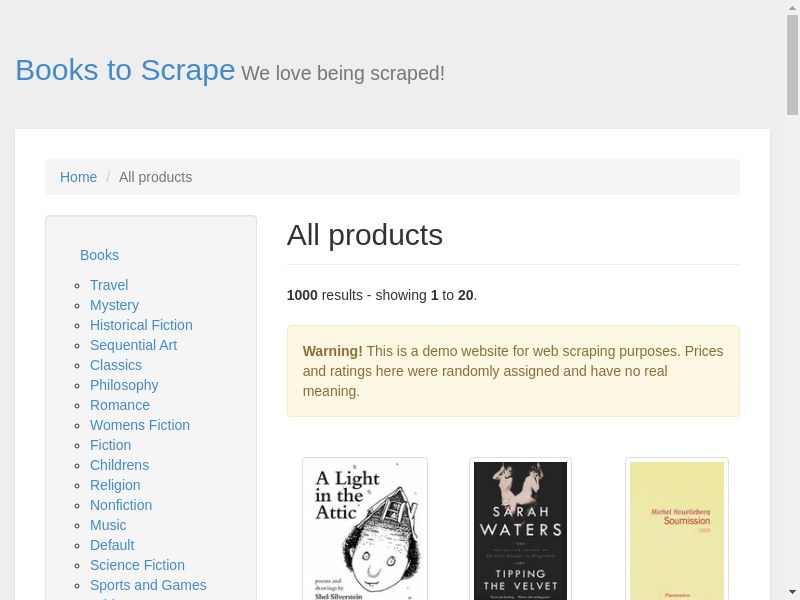

In [ ]:
fuente = 'books'
path_png= f'/content/drive/MyDrive/WebScrapping/imagenes/{fuente}.png'
browser.save_screenshot(path_png)
Image(path_png) #para ver la imagen

## Accediendo a Science Fiction

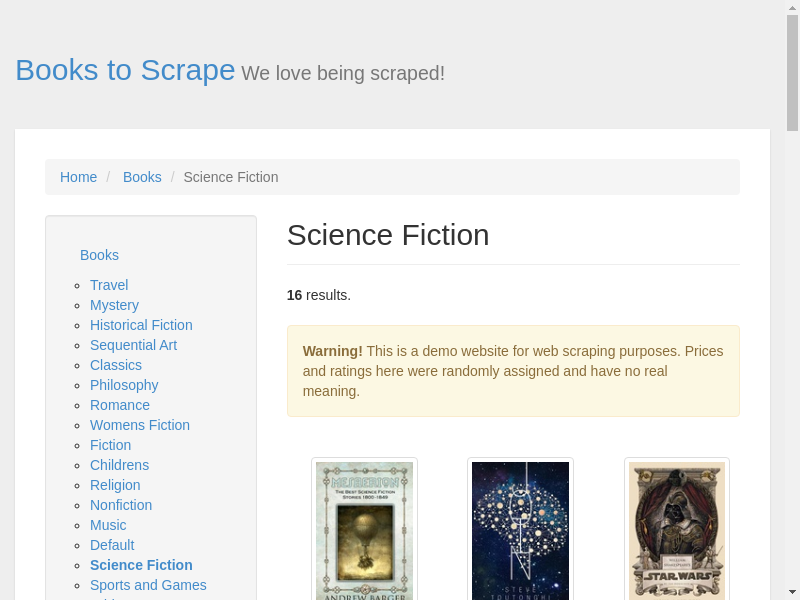

In [ ]:
xpath_input='//ul[@class ="nav nav-list"]//ul/li[15]/a'
e_input = browser.find_element(By.XPATH ,xpath_input )
e_input.send_keys(Keys.RETURN) 
time.sleep(1)

browser.save_screenshot(path_png)
Image(path_png)

In [ ]:
xpath_results = '//ol[@class="row"]/li'
e_books = browser.find_elements(By.XPATH, xpath_results )

In [ ]:
e_books #lista de resultados a iterar

[<selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="eca0fc28-6e56-43d8-8ce1-a257214aef4e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="cd5889e8-3442-455a-93ee-e8ca31e4cbe8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="b73db96c-d191-4127-b858-66eba9dfbdd4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="5eccf181-50a4-4ccf-a6f5-64c4a4ae8767")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="a526a0f9-1ca0-4775-9217-53ac6c7ceda3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="5e3541d2-de1b-4d7d-9e9f-fa28f60b4cbb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ac10aa21d3f7078c6f329842d8b5a55", element="c1fc4a51-9388-457c-a400-c8

In [ ]:
#e_book = e_books[0] , para pruebas individuales

## Iterando

In [ ]:
list_dict = list()
for e_book in e_books:
  dict_data = dict()
  dict_data['name_book'] =  e_book.find_element(By.XPATH, './/h3').text
  dict_data['link_book'] =  e_book.find_element(By.XPATH, './/h3/a').get_attribute('href') 
  dict_data['price_book'] = e_book.find_element(By.XPATH, './/div[2]/p[1]').text
  dict_data['dispo_book'] = e_book.find_element(By.XPATH, './/div[2]/p[2]').text

  #Definiendo nueva ventanta
  browser.execute_script('window.open()')
  window_before = browser.window_handles[0]
  window_after = browser.window_handles[1]

  #cambiando de ventana
  browser.switch_to.window(window_after)
  browser.get(dict_data['link_book'])

  #Scrapear
  dict_data['description'] = browser.find_element(By.XPATH, '//div[@id="product_description"]/following-sibling::p[1]').text

  #Cerrando pestaña actual
  browser.close()

  #Regresando a pestaña inicial
  browser.switch_to.window(window_before)

  list_dict.append(dict_data)

In [ ]:
len(list_dict) # total de libros en la página

16

In [ ]:
list_dict

## Guardado 

In [ ]:
import csv

fuente = 'books'

path_fname = f'/content/drive/MyDrive/WebScrapping/{fuente}.csv'

with open(path_fname, 'w', newline='') as f:
  writer = csv.DictWriter(
      f,
      delimiter=',',
      quotechar='"',
      fieldnames=list_dict[0].keys()
  )

  writer.writeheader()
  writer.writerows(list_dict) 

In [ ]:
import json
fuente = 'books'

path_fname = f'/content/drive/MyDrive/WebScrapping/{fuente}.json'

f= open(path_fname, 'w')
f.write(json.dumps(list_dict))
f.close()

## Cerrando browser

In [ ]:
browser.quit()